**Questions about Data Quality**

The number of staff in this company seems excessive.  We are looking at over 400,000 staff.  Also surprisingly all the titles have an average salary that is in a very similar range which does seem odd.

In [65]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as sts






In [ ]:
#connect postgres database
conn = psycopg2.connect(host="localhost", port = 5432, database="EmployeeSQL", user="postgres", password="postgres")
cur = conn.cursor()

In [52]:
#get salaries table from database
cur.execute("""SELECT * FROM salaries""")
salary_results = cur.fetchall()


In [53]:
#create dataframe of salaries table
salary_query_df = pd.DataFrame(salary_results, columns=['emp_no', 'salary', 'from', 'to'])
salary_query_df

,emp_no,salary,from,to
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


In [54]:
#get titles table from database
cur.execute("""SELECT * FROM titles""")
title_results = cur.fetchall()


In [55]:
#create dataframe of titles table
title_query_df = pd.DataFrame(title_results, columns=['emp_no', 'title', 'from', 'to'])
title_query_df

,emp_no,title,from,to
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [64]:
#Merge salaries and titles table
salary_title_df = salary_query_df.merge(title_query_df, on = 'emp_no', how = 'inner', suffixes = ('_salary', '_title'))
salary_title_df

,emp_no,salary,from_salary,to_salary,title,from_title,to_title
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...
443303,499997,49597,1987-08-30,1988-08-29,Engineer,1987-08-30,1992-08-29
443304,499997,49597,1987-08-30,1988-08-29,Senior Engineer,1992-08-29,9999-01-01
443305,499998,40000,1993-12-27,1994-12-27,Senior Staff,1998-12-27,9999-01-01
443306,499998,40000,1993-12-27,1994-12-27,Staff,1993-12-27,1998-12-27


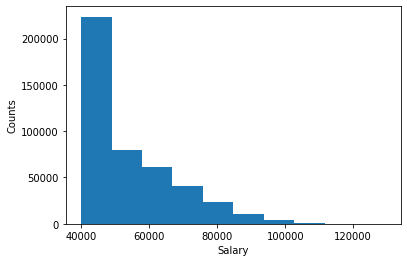

In [66]:
#Create histogram of salary counts by salary range
plt.hist(salary_title_df['salary'])
plt.xlabel('Salary')
plt.ylabel('Counts')
plt.show()

In [72]:
#Get statistics for the salary data by title
salary_title_stats = salary_title_df.groupby('title')['salary'].describe()
salary_title_stats

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Assistant Engineer,15128.0,48493.204786,10247.593341,40000.0,40000.0,44435.0,54600.00,102288.0
Engineer,115003.0,48539.781423,10316.455234,40000.0,40000.0,44504.0,54675.50,110449.0
Manager,24.0,51531.041667,12068.128725,40000.0,40000.0,48458.5,60358.75,72446.0
Senior Engineer,97750.0,48506.751806,10252.364539,40000.0,40000.0,44502.5,54603.75,110449.0
Senior Staff,92853.0,58503.286614,16505.512022,40000.0,41072.0,56433.0,70616.00,129492.0
Staff,107391.0,58465.271904,16499.346126,40000.0,41012.5,56407.0,70532.50,129492.0
Technique Leader,15159.0,48580.505772,10313.486129,40000.0,40000.0,44545.0,54949.00,104065.0


In [77]:
# Get mean salaries for each role
salary_title_plot_data = salary_title_stats[["mean"]]

salary_title_plot_data.head()

,mean
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614


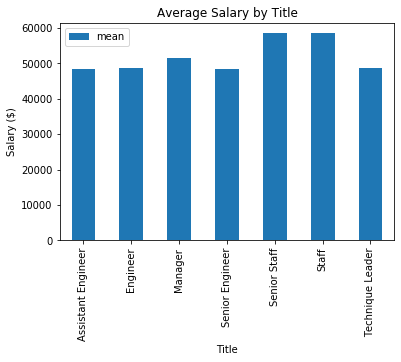

<Figure size 432x288 with 0 Axes>

In [86]:
# Plot average salary by title
ax = salary_title_plot_data.plot(kind="bar",title ="Average Salary by Title" )
ax.set(xlabel='Title', ylabel='Salary ($)')


plt.show()
plt.tight_layout()